In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Para los jugadores voy a utilizar un dataframe que encontre en Kragle con los datos del FIFA24 con estadisticas de los jugadores 

In [13]:
# Subo el dataser
df = pd.read_csv('https://raw.githubusercontent.com/Havilongo/Proyecto-CoderHouse/main/all_players.csv', low_memory=False, index_col=0)
#df2 = pd.read_csv('https://raw.githubusercontent.com/thepycoach/fifa-world-cup-2022-prediction/main/data/players_22.csv')
# selecting column
df = df[['Name', 'Age', 'Nation', 'Overall', 'Gender',
        'Club', 'Preferred foot', 'Skill moves', 'Position']]


# dropping nan
df.isna().sum()

Name              0
Age               0
Nation            0
Overall           0
Gender            0
Club              0
Preferred foot    0
Skill moves       0
Position          0
dtype: int64

In [14]:
# Filtro solo los masculinos
df = df.loc[df['Gender'] == 'M']
df

,Name,Age,Nation,Overall,Gender,Club,Preferred foot,Skill moves,Position
0,Kylian Mbappé,24,France,91,M,Paris SG,Right,5,ST
1,Erling Haaland,23,Norway,91,M,Manchester City,Left,3,ST
2,Kevin De Bruyne,32,Belgium,91,M,Manchester City,Right,4,CM
3,Lionel Messi,36,Argentina,90,M,Inter Miami CF,Left,4,CF
4,Karim Benzema,35,France,90,M,Al Ittihad,Right,4,CF
...,...,...,...,...,...,...,...,...,...
15840,Deven Sawhney,21,India,47,M,Odisha FC,Left,2,LB
15841,Wang Tengda,22,China PR,47,M,Dalian Pro,Right,2,CM
15842,Wu Yuhang,22,China PR,47,M,Zhejiang Pro,Right,2,CDM
15843,Ye Daoxin,17,China PR,47,M,Zhejiang Pro,Right,2,CB


### Filtro por los equipos presentes en la copa

In [15]:
equipos_copa = [
    'Peru', 'Brazil', 'Canada', 'Argentina',
    'Mexico', 'Uruguay', 'Bolivia', 'United States', 
    'Canada', 'Ecuador', 'Costa Rica','Chile', 
    'Venezuela' ,'Paraguay','Jamaica', 'Panama'
]

# filtering only national teams in the world cup
df = df[df['Nation'].isin(equipos_copa)]

In [16]:
# best players
df.sort_values(by=['Overall', 'Skill moves'], ascending=False, inplace=True)

C:\Users\theja\AppData\Local\Temp\ipykernel_10088\1545088054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Overall', 'Skill moves'], ascending=False, inplace=True)


# Distribucion de los caracteriticas de los jugadores

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


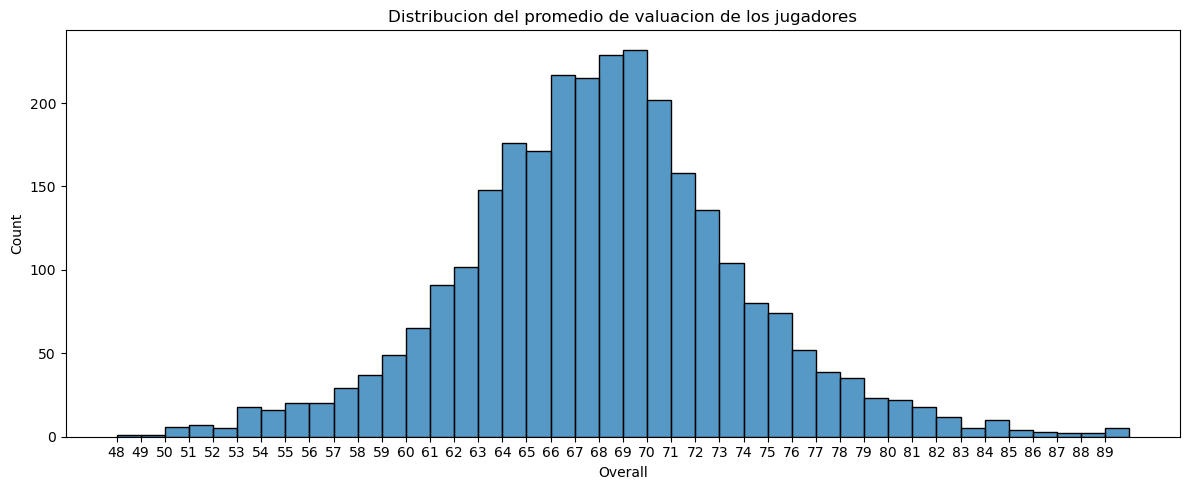

In [17]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='Overall', binwidth=1)

bins = np.arange(df['Overall'].min(), df['Overall'].max(), 1)
plt.title('Distribucion del promedio de valuacion de los jugadores')
plt.xticks(bins)
plt.show()

# Distribucion de la edad de los jugadores 

C:\Users\theja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


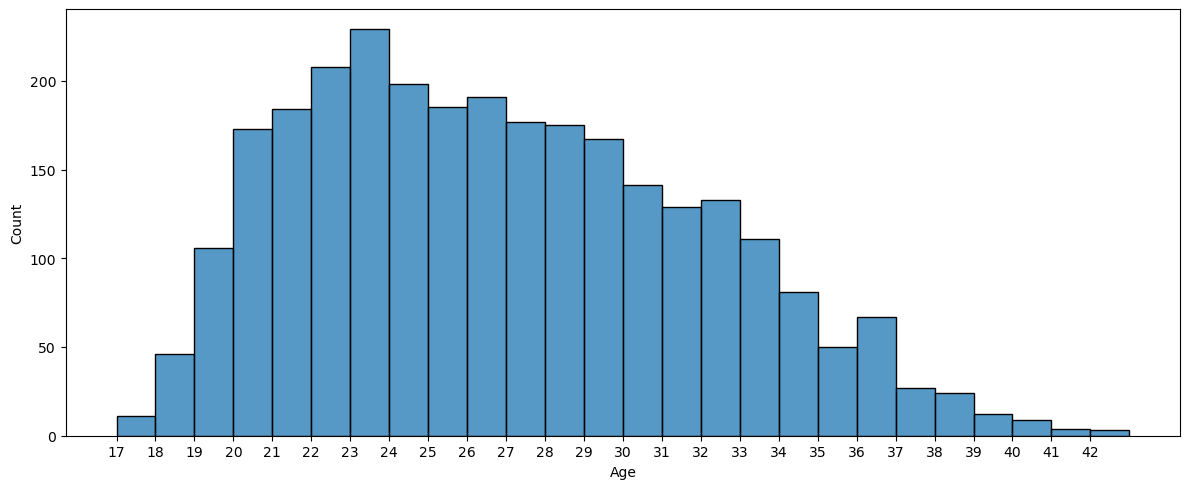

In [18]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='Age', binwidth=1)

bins = np.arange(df['Age'].min(), df['Age'].max(), 1)
plt.xticks(bins)
plt.show()

# Graficos por equipo

In [19]:
promedio_overall = df.groupby('Nation')[['Overall']].mean()
promedio_overall

,Overall
Nation,
Argentina,69.057889
Bolivia,63.088235
Brazil,71.255556
Canada,65.246575
Chile,66.132353
Costa Rica,68.166667
Ecuador,67.014706
Jamaica,66.833333
Mexico,69.235294


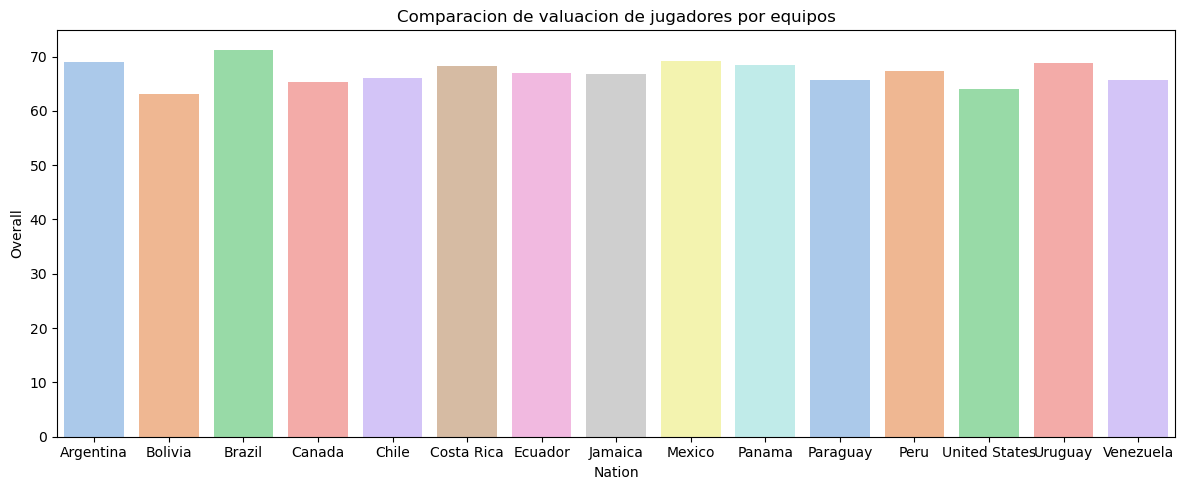

In [20]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.barplot(promedio_overall, x=promedio_overall.index, y='Overall',
            palette=sns.color_palette('pastel'))
plt.title('Comparacion de valuacion de jugadores por equipos')
plt.show()

###  No hay mucha diferencia entre equipos, tal vez una vez que sepa que jugadores van, puedo filtrar la lista por aquellos jugadores.